# Traitement de données TD4

Le code pour ce TD est à rendre sur Arche avant le **lundi 5 décembre 2022** sous la forme d'un notebook (.ipynb). Si vous utilisez Google colab, télécharger le fichier .ipynb pour le déposer sur Arche. 

Les critères d'évaluation incluent la qualité du traitement des données, l'utilisation judicieuse des functions de pandas (et d'autres librairies python) et la clarté des résultats de l'analyse (c.à.d est-ce que la préparation de vos données vous permet de justifier vos conclusions ?) 

# Données

Le fichier à l'adresse https://mdaquin.github.io/d/installations_solaire.csv contient des données sur les installations de panneaux solaires et leur raccordement dans les communes de France entre 2017 et 2021. Ces données proviennent du [site de l'agence ORE](https://www.agenceore.fr/opendata/installations-de-production-de-la-filiere-solaire-par-commune). 

L'objectif du TD est de comprendre quels facteurs (géographiques, économiques, etc.) influent sur ces installations.

# Tâches 

Votre objectif ici est donc d'analyser ces données en relation avec d'autres données que vous trouverez en ligne afin :
1. d'expliquer les différences en nombre/puissance et évolution des installations entre regions de France.
2. d'expliquer les différences en nombre/puissance et évolution des installations entre les communes du Grand Est.

Pour cela, il vous faudra trouver des données supplémentaires sur les régions de France et les communes du Grand Est. Vous pourrez **par exemple** trouver de telles données:
- Sur le site de données du gouvernement français : https://www.data.gouv.fr/
- Sur le site de données du Grand Est : https://www.datagrandest.fr/
- Sur beaucoup d'autres sites s'intéréssant à des éléments de données potentiellement pertinents pour votre analyse

# Format du rendu

Le rendu est demandé sous la forme d'un notebook de façon à ce qu'il puisse jouer le role à la fois de code et de rapport pour votre analyse. Il est important donc d'ajouter des cellules de texte pour, au fur et à mesure du code et des tâches, expliquer votre démarche, vos résultats et vos conclusions.

N'hésitez pas aussi à ajouter des commentaires dans le code pour le rendre plus lisible. 

In [ ]:
import pandas as pd

df = pd.read_csv("https://mdaquin.github.io/d/installations_solaire.csv", sep=";")
df["Régime d'exploitation"].value_counts()/len(df)


Realised    0.514858
Project     0.041191
Name: Régime d'exploitation, dtype: float64

In [ ]:
df.Région.value_counts()

Nouvelle-Aquitaine            22701
Occitanie                     22412
Grand Est                     21846
Auvergne-Rhône-Alpes          20987
Bourgogne-Franche-Comté       16397
Hauts-de-France               15521
Normandie                     11869
Centre-Val de Loire            8935
Pays de la Loire               7094
Bretagne                       6421
Île-de-France                  5753
Provence-Alpes-Côte d’Azur     5194
Corse                           263
Martinique                       96
Guadeloupe                       88
La Réunion                       76
Guyane                           56
Provence-Alpes-Côte d'Azur       24
Grand-Est                         6
Name: Région, dtype: int64

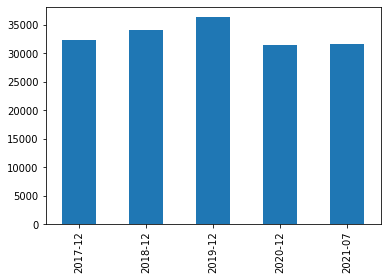

In [ ]:
df["Date de la donnée"].value_counts().sort_index().plot(kind="bar")

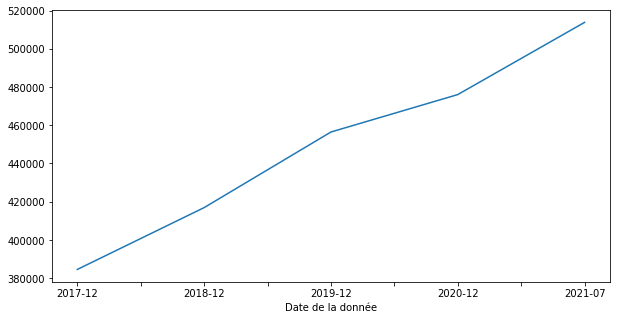

In [ ]:
df.groupby("Date de la donnée").Compte.sum().plot(figsize=(10,5))

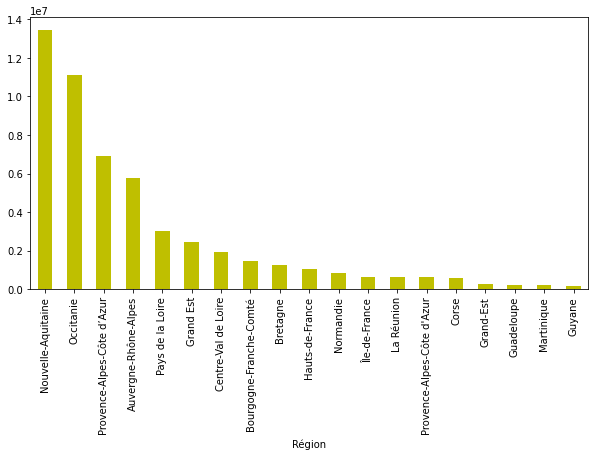

In [ ]:
df.groupby("Région")["Puissance de raccordement"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,5), color="y")

False    165557
True        182
dtype: int64
===
Occitanie                     35
Nouvelle-Aquitaine            29
Bourgogne-Franche-Comté       27
Grand Est                     26
Auvergne-Rhône-Alpes          17
Centre-Val de Loire           15
Normandie                     14
Hauts-de-France                7
Île-de-France                  5
Provence-Alpes-Côte d'Azur     5
Bretagne                       1
Pays de la Loire               1
Name: Région, dtype: int64
===
2019-12    179
2020-12      2
2017-12      1
Name: Date de la donnée, dtype: int64


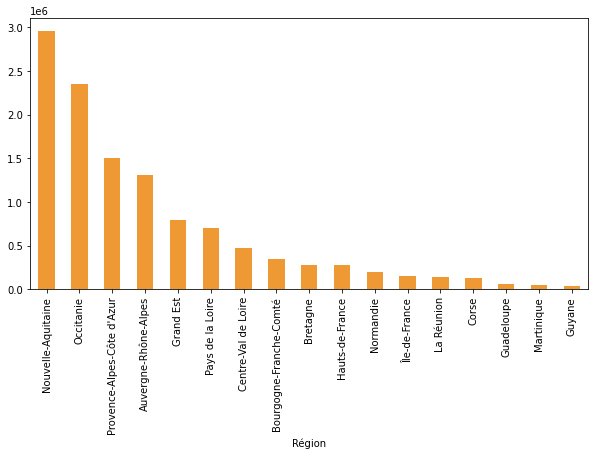

In [ ]:
df.replace("Provence-Alpes-Côte d’Azur", "Provence-Alpes-Côte d'Azur", inplace=True)
df.replace("Grand-Est", "Grand Est", inplace=True)
df[df["Date de la donnée"] == "2021-07"].groupby("Région")["Puissance de raccordement"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,5), color="#ee9933")

print(df.duplicated().value_counts())
print("===")
print(df[df.duplicated()].Région.value_counts())
print("===")
print(df[df.duplicated()]["Date de la donnée"].value_counts())

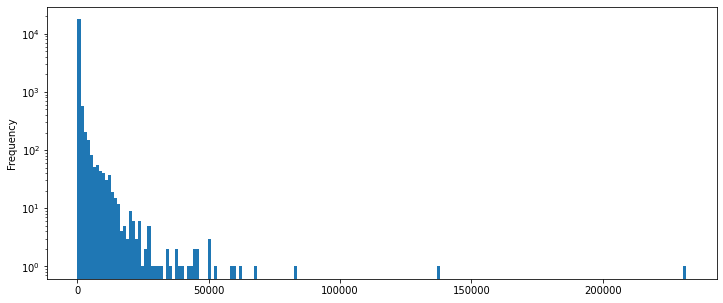

In [ ]:
# df["Compte"].plot(kind="hist", bins=200, figsize=(12,5))
plt = df[df["Date de la donnée"] == "2021-07"]["Puissance de raccordement"].plot(kind="hist", bins=200, figsize=(12,5))
plt.set_yscale("log")

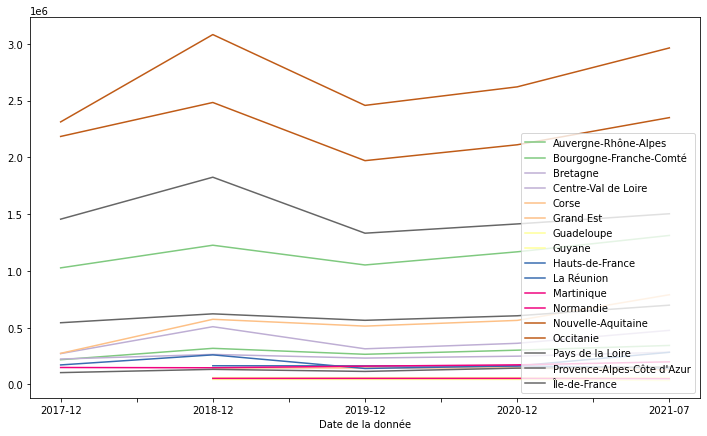

In [ ]:
date_region = df.groupby(["Région", "Date de la donnée"])["Puissance de raccordement"].sum()
date_region = date_region.reset_index()
date_region = date_region.pivot_table(values="Puissance de raccordement", index="Région", columns="Date de la donnée")
date_region
date_region.T.plot(figsize=(12,7), colormap="Accent").legend(loc="lower right")

# attention à la colonne Regime d'exploitation. Certainnes installations sont en projet.

In [ ]:
regions = pd.DataFrame()
regions["Compte"] = df[...].groupby("Région").Compte.sum()
regions["Puissance"] = df.groupby("Région")["Puissance de raccordement"].sum()
regions["code"] = df.groupby("Région")["Code région"].first() # vérifier la cohérence
regions

,Compte,Puissance,code
Région,,,
Auvergne-Rhône-Alpes,374819,5.786452e+06,84
Bourgogne-Franche-Comté,116232,1.448686e+06,27
Bretagne,110554,1.255690e+06,53
Centre-Val de Loire,80005,1.934679e+06,24
Corse,787,5.654527e+05,94
Grand Est,176836,2.717473e+06,44
Guadeloupe,1028,2.412655e+05,1
Guyane,250,1.701680e+05,3
Hauts-de-France,116662,1.021589e+06,32
